In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

O dataset diabetes representa um problema de regressão que descreve um problema de predição de progressão de uma doença relacionada ao diabetes. O objetivo principal é prever a progressão de uma doença (representada pela variável target) com base em uma série de variáveis explicativas (atributos), que são características físicas e biométricas de pacientes.

In [11]:
# Carregar o dataset Diabetes (problema de regressão mais leve)
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data['Target'] = diabetes.target

# Divisão entre atributos (X) e alvo (y)
X = data.drop('Target', axis=1)
y = data['Target']

In [12]:
# Divisão em conjunto de treinamento (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Lista de modelos para teste
models = {
    "Linear Regression": LinearRegression(),
    "Logistic Regression (Approximated)": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "SVM": SVR(kernel='rbf'),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "MLP Regressor": MLPRegressor(random_state=42, max_iter=1000),
    "Deep Learning (Simplified MLP)": MLPRegressor(hidden_layer_sizes=(128, 64, 32), random_state=42, max_iter=1000)
}

# Dicionário para armazenar os resultados
results = {}

# Treinamento, predição e cálculo do erro médio quadrático (MSE)
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        results[name] = {
            "model": model,
            "mse": mse,
            "predictions": predictions
        }
        print(f"{name} - MSE: {mse:.4f}")
    except Exception as e:
        print(f"{name} - Error: {e}")

# Ordenar modelos pelo MSE
sorted_results = sorted(results.items(), key=lambda x: x[1]['mse'])

Linear Regression - MSE: 2821.7510
Logistic Regression (Approximated) - MSE: 8099.9624
KNN - MSE: 3222.1179
Decision Tree - MSE: 5697.7895
Random Forest - MSE: 2859.6420
SVM - MSE: 4525.8102
Gradient Boosting - MSE: 3072.9645
XGBoost - MSE: 3513.6592
MLP Regressor - MSE: 3147.4418
Deep Learning (Simplified MLP) - MSE: 2789.1385


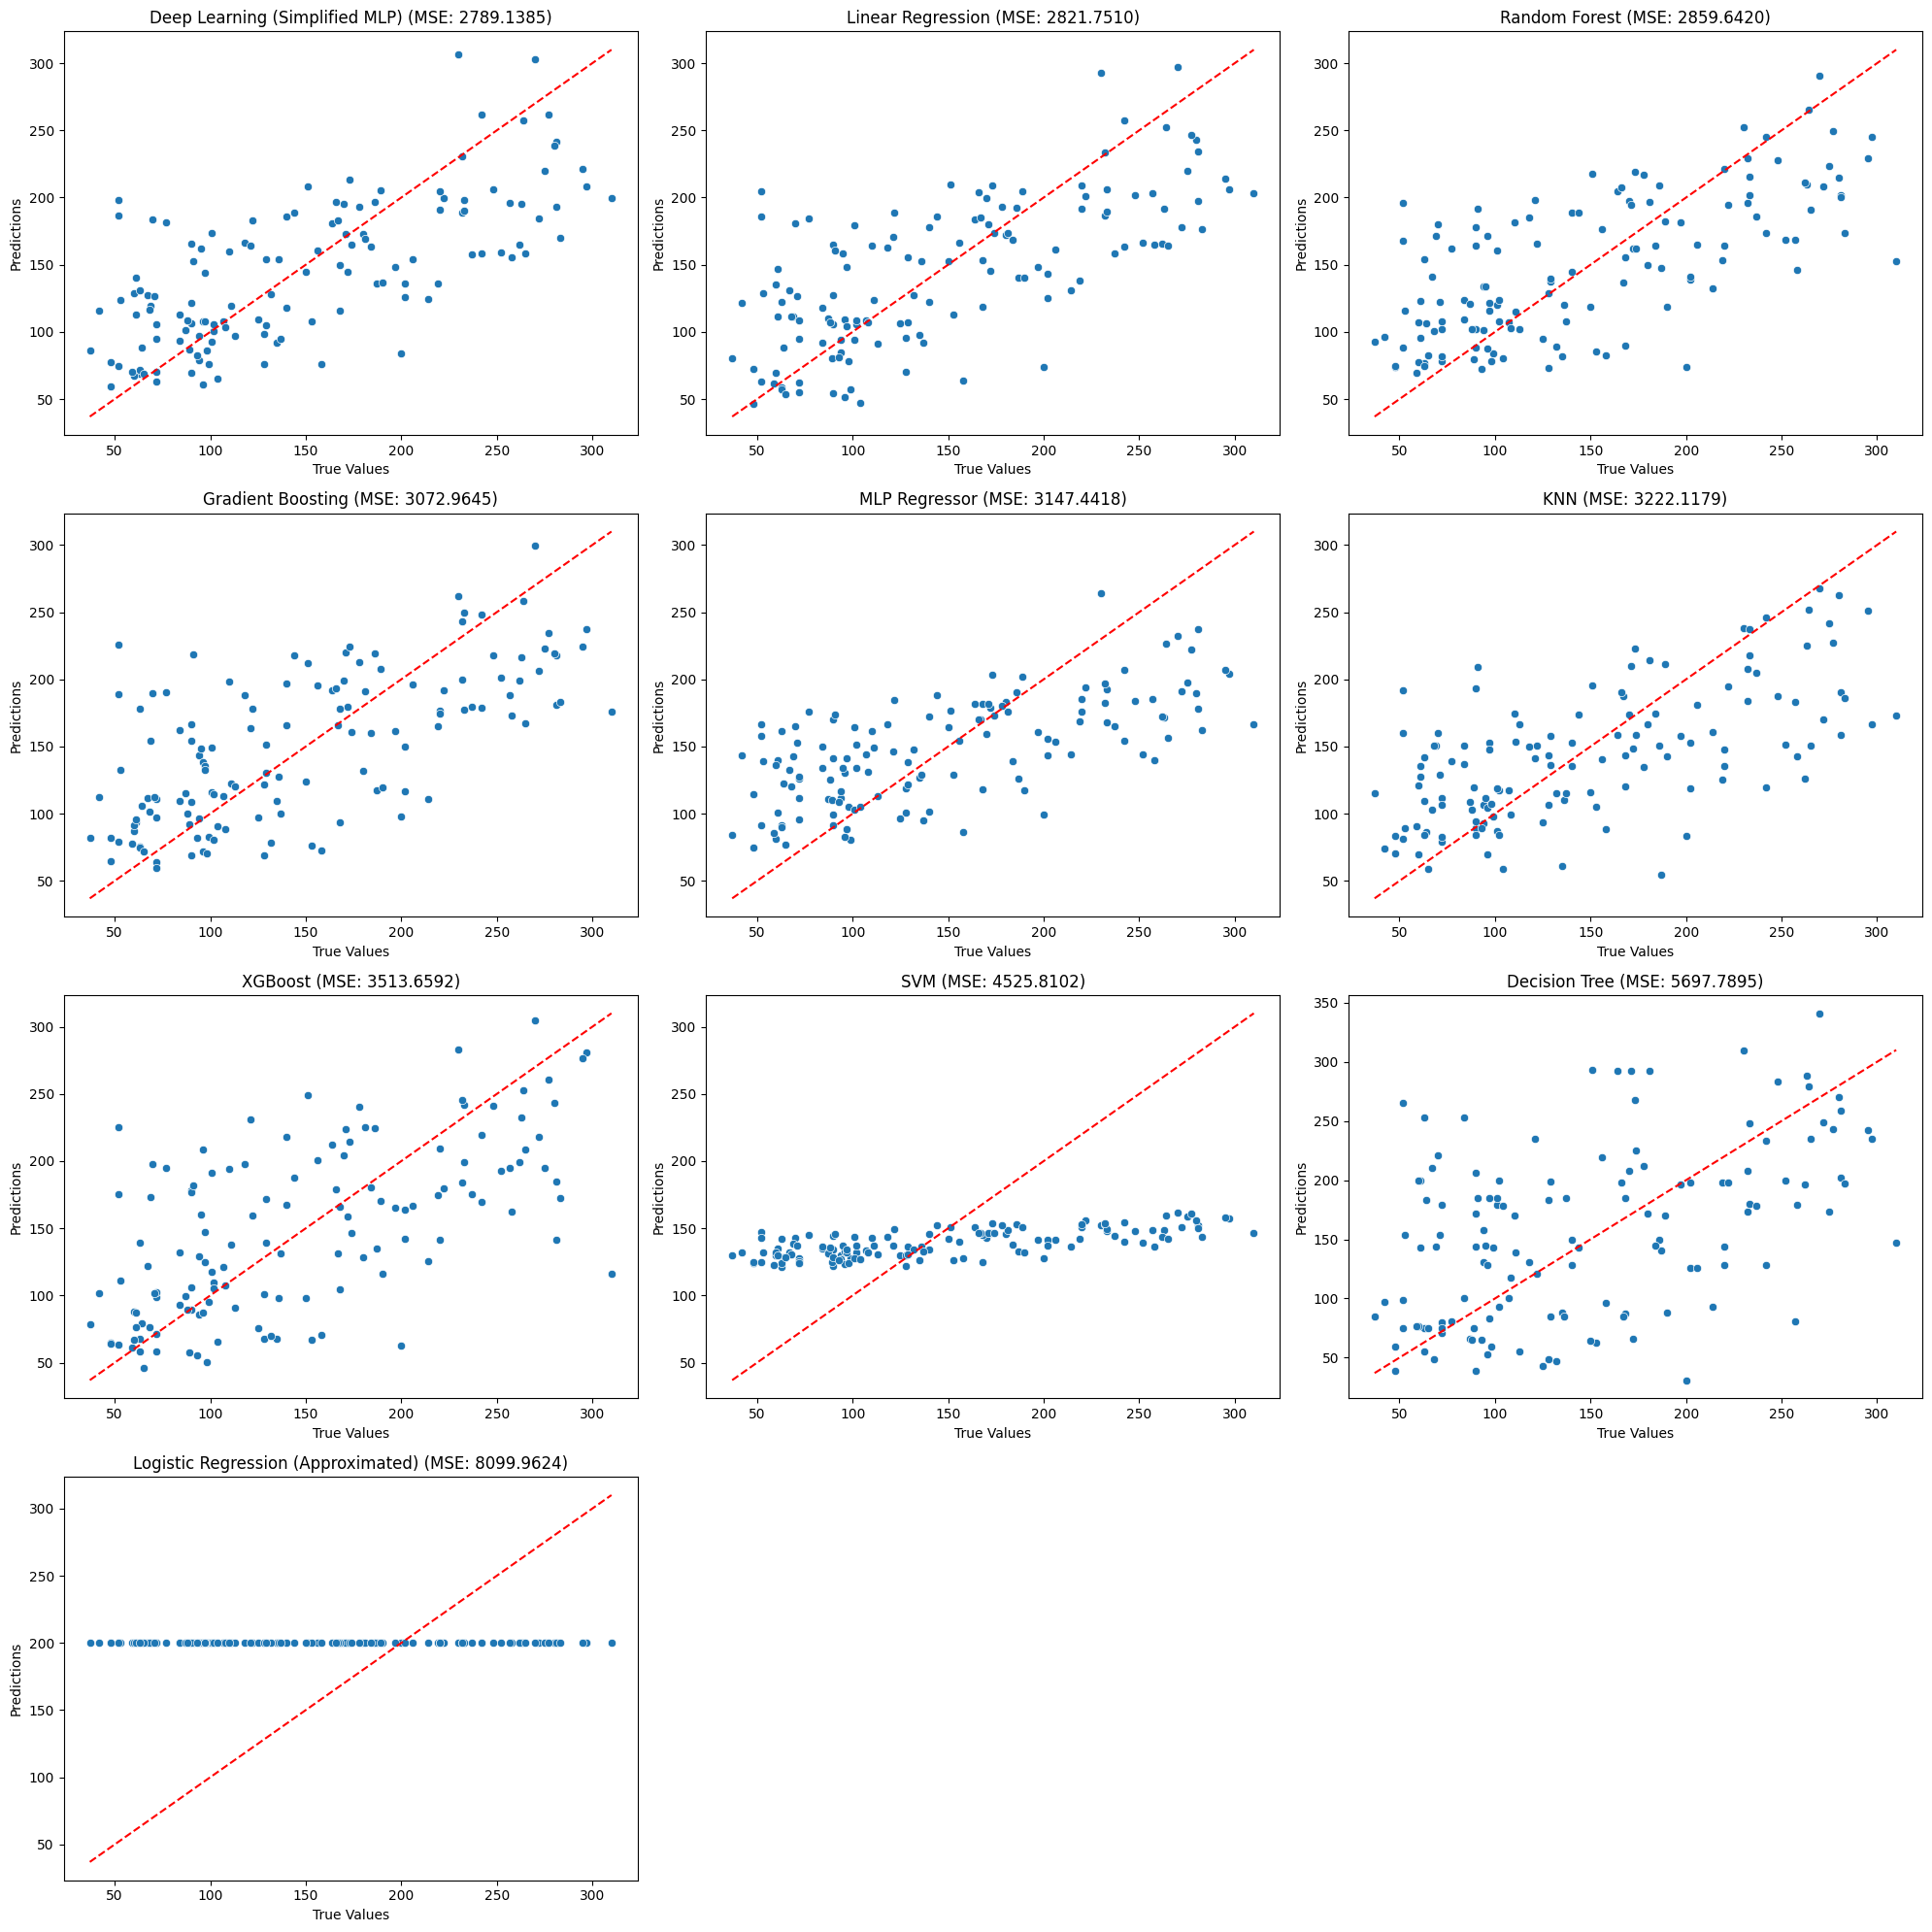

In [15]:
# Gráficos scatter plot para cada modelo separadamente
plt.figure(figsize=(20, 20))
for i, (name, res) in enumerate(sorted_results, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(x=y_test, y=res['predictions'])
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.title(f"{name} (MSE: {res['mse']:.4f})")
    plt.xlabel("True Values")
    plt.ylabel("Predictions")

plt.tight_layout()
plt.show()

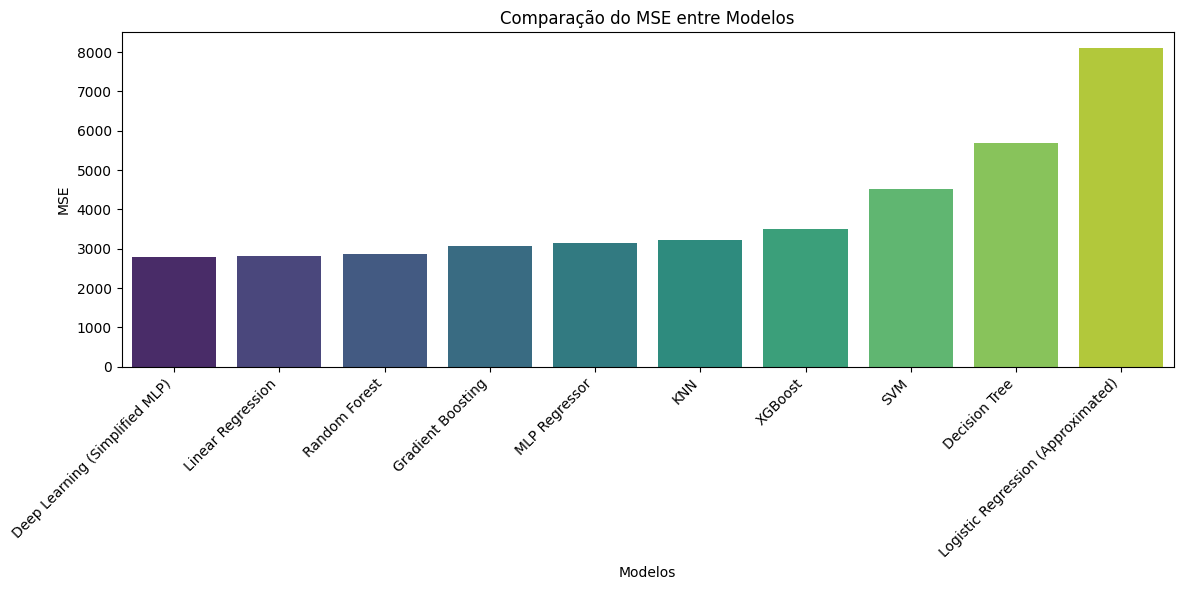

In [14]:
# Gráfico para comparar MSE dos modelos
plt.figure(figsize=(12, 6))
model_names = [name for name, res in sorted_results]
model_mse = [res['mse'] for name, res in sorted_results]
sns.barplot(x=model_names, y=model_mse, palette="viridis")
plt.title("Comparação do MSE entre Modelos")
plt.xlabel("Modelos")
plt.ylabel("MSE")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()